In [57]:
import pandas as pd
import numpy as np

## Main datatypes

series = pd.Series(["BMW", "Toyota", "Honda"])

In [75]:
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [6]:
# series = 1-dimensional

In [7]:
colours = pd.Series(["Red", "Blue","White"])
colours

0      Red
1     Blue
2    White
dtype: object

In [8]:
# DataFrame = 2-dimensional
car_data = pd.DataFrame({"Car make": series, "Colours": colours})
car_data

,Car make,Colours
0,BMW,Red
1,Toyota,Blue
2,Honda,White


In [9]:
# Import data
car_sales  = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [10]:
# Export data
car_sales.to_csv("exported-car-sales-csv")

## Describe data

In [11]:
# Attribute
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [12]:
# Fuction
# car_sales.to_csv()

In [13]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [14]:
car_columns = car_sales.columns
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [15]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [16]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [17]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Make             10 non-null object
Colour           10 non-null object
Odometer (KM)    10 non-null int64
Doors            10 non-null int64
Price            10 non-null object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [18]:
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [19]:
car_prices = pd.Series([3000, 1500, 111250])
car_prices.mean()

38583.333333333336

In [20]:
car_prices.sum()

115750

In [21]:
car_sales["Doors"].mean()

4.0

## Viewing and selecting data

In [22]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [23]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [24]:
# .loc & .iloc ->. index modification
animals = pd.Series(["cat","dog","bird","panda","snake"],
                   index=[5,12,53,64,2])

In [25]:
panda = animals[64]
panda

'panda'

In [26]:
bmw_cars = car_sales.loc[3]
bmw_cars

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [27]:
black_colour = car_sales["Colour"][3]
black_colour

'Black'

In [28]:
black_colour = car_sales.Colour[3]
black_colour

'Black'

In [29]:
green_cars = car_sales[car_sales.Colour == "Blue"]
green_cars

,Make,Colour,Odometer (KM),Doors,Price
2,Toyota,Blue,32549,3,"$7,000.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"


In [30]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


### Equivalents

In [31]:
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [32]:
car_sales[car_sales.Make == "Honda"]["Odometer (KM)"].mean()

62778.333333333336

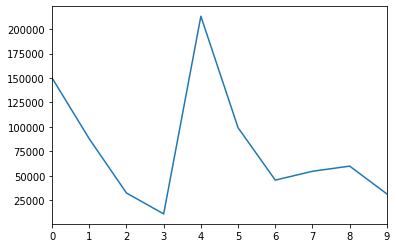

In [33]:
car_sales["Odometer (KM)"].plot()

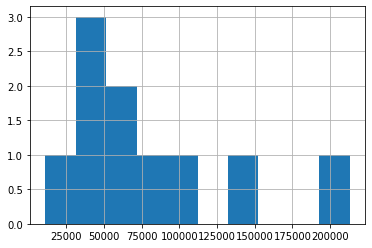

In [34]:
car_sales["Odometer (KM)"].hist()

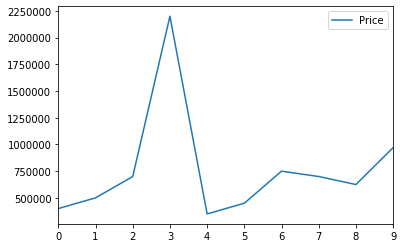

In [35]:
prices = pd.DataFrame(car_sales["Price"])
int_prices = prices.replace('[\$\,\.]', '', regex=True).astype(int)
int_prices.plot()

## Manipulation Data

### Replacing missing values

In [45]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [46]:
sales_mean = car_sales_missing["Odometer"].mean()
sales_mean

92302.66666666667

In [49]:
car_sales_missing["Odometer"] = car_sales_missing["Odometer"].fillna(sales_mean)

In [51]:
car_sales_missing.dropna(inplace=True)

In [52]:
car_sales_missing.to_csv("car-salles-missing-dropped")

### Column from series

In [53]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [72]:
seats = pd.Series([5,4,3,2,1])
car_sales["Seats"] = np.random.randint(2,5)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,"$4,000.00",4
1,Honda,Red,87899,4,"$5,000.00",4
2,Toyota,Blue,32549,3,"$7,000.00",4
3,BMW,Black,11179,5,"$22,000.00",4
4,Nissan,White,213095,4,"$3,500.00",4
5,Toyota,Green,99213,4,"$4,500.00",4
6,Honda,Blue,45698,4,"$7,500.00",4
7,Honda,Blue,54738,4,"$7,000.00",4
8,Toyota,White,60000,4,"$6,250.00",4
9,Nissan,White,31600,4,"$9,700.00",4


In [74]:
car_sales["Seats"] = car_sales["Seats"].fillna(5) 
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,"$4,000.00",5
1,Honda,Red,87899,4,"$5,000.00",5
2,Toyota,Blue,32549,3,"$7,000.00",5
3,BMW,Black,11179,5,"$22,000.00",5
4,Nissan,White,213095,4,"$3,500.00",5
5,Toyota,Green,99213,4,"$4,500.00",5
6,Honda,Blue,45698,4,"$7,500.00",5
7,Honda,Blue,54738,4,"$7,000.00",5
8,Toyota,White,60000,4,"$6,250.00",5
9,Nissan,White,31600,4,"$9,700.00",5


In [78]:
car_sales["Fuel per 100KM"] = np.random.randint(4,7)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,Toyota,White,150043,4,"$4,000.00",5,5
1,Honda,Red,87899,4,"$5,000.00",5,5
2,Toyota,Blue,32549,3,"$7,000.00",5,5
3,BMW,Black,11179,5,"$22,000.00",5,5
4,Nissan,White,213095,4,"$3,500.00",5,5
5,Toyota,Green,99213,4,"$4,500.00",5,5
6,Honda,Blue,45698,4,"$7,500.00",5,5
7,Honda,Blue,54738,4,"$7,000.00",5,5
8,Toyota,White,60000,4,"$6,250.00",5,5
9,Nissan,White,31600,4,"$9,700.00",5,5


In [84]:
# How much fuel does car used in lifetime?

car_sales["Total fuel used"] = car_sales["Odometer (KM)"] / 100 * car_sales["Fuel per 100KM"]
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used
0,Toyota,White,150043,4,"$4,000.00",5,5,7502.15
1,Honda,Red,87899,4,"$5,000.00",5,5,4394.95
2,Toyota,Blue,32549,3,"$7,000.00",5,5,1627.45
3,BMW,Black,11179,5,"$22,000.00",5,5,558.95
4,Nissan,White,213095,4,"$3,500.00",5,5,10654.75
5,Toyota,Green,99213,4,"$4,500.00",5,5,4960.65
6,Honda,Blue,45698,4,"$7,500.00",5,5,2284.90
7,Honda,Blue,54738,4,"$7,000.00",5,5,2736.90
8,Toyota,White,60000,4,"$6,250.00",5,5,3000.00
9,Nissan,White,31600,4,"$9,700.00",5,5,1580.00


In [90]:
car_sales["Has accident"] = np.random.choice([False, True])
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used,Has accident
0,Toyota,White,150043,4,"$4,000.00",5,5,7502.15,False
1,Honda,Red,87899,4,"$5,000.00",5,5,4394.95,False
2,Toyota,Blue,32549,3,"$7,000.00",5,5,1627.45,False
3,BMW,Black,11179,5,"$22,000.00",5,5,558.95,False
4,Nissan,White,213095,4,"$3,500.00",5,5,10654.75,False
5,Toyota,Green,99213,4,"$4,500.00",5,5,4960.65,False
6,Honda,Blue,45698,4,"$7,500.00",5,5,2284.90,False
7,Honda,Blue,54738,4,"$7,000.00",5,5,2736.90,False
8,Toyota,White,60000,4,"$6,250.00",5,5,3000.00,False
9,Nissan,White,31600,4,"$9,700.00",5,5,1580.00,False


In [93]:
# Remove colums
car_sales = car_sales.drop("Seats", axis=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Fuel per 100KM,Total fuel used,Has accident
0,Toyota,White,150043,4,"$4,000.00",5,7502.15,False
1,Honda,Red,87899,4,"$5,000.00",5,4394.95,False
2,Toyota,Blue,32549,3,"$7,000.00",5,1627.45,False
3,BMW,Black,11179,5,"$22,000.00",5,558.95,False
4,Nissan,White,213095,4,"$3,500.00",5,10654.75,False
5,Toyota,Green,99213,4,"$4,500.00",5,4960.65,False
6,Honda,Blue,45698,4,"$7,500.00",5,2284.90,False
7,Honda,Blue,54738,4,"$7,000.00",5,2736.90,False
8,Toyota,White,60000,4,"$6,250.00",5,3000.00,False
9,Nissan,White,31600,4,"$9,700.00",5,1580.00,False


In [96]:
# Get random 20% of data
car_sales_shuffled = car_sales.sample(frac=0.2)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Fuel per 100KM,Total fuel used,Has accident
1,Honda,Red,87899,4,"$5,000.00",5,4394.95,False
8,Toyota,White,60000,4,"$6,250.00",5,3000.00,False


In [101]:
# apply lamdas

car_sales["Odometer (Miles)"] = car_sales["Odometer (KM)"].apply(lambda x: x / 1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Fuel per 100KM,Total fuel used,Has accident,Odometer (Miles)
0,Toyota,White,150043,4,"$4,000.00",5,7502.15,False,93776.875
1,Honda,Red,87899,4,"$5,000.00",5,4394.95,False,54936.875
2,Toyota,Blue,32549,3,"$7,000.00",5,1627.45,False,20343.125
3,BMW,Black,11179,5,"$22,000.00",5,558.95,False,6986.875
4,Nissan,White,213095,4,"$3,500.00",5,10654.75,False,133184.375
5,Toyota,Green,99213,4,"$4,500.00",5,4960.65,False,62008.125
6,Honda,Blue,45698,4,"$7,500.00",5,2284.90,False,28561.250
7,Honda,Blue,54738,4,"$7,000.00",5,2736.90,False,34211.250
8,Toyota,White,60000,4,"$6,250.00",5,3000.00,False,37500.000
9,Nissan,White,31600,4,"$9,700.00",5,1580.00,False,19750.000
